## Try to understand bathymetry grid cells of Fraser River inside NEMO

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from salishsea_tools import bathy_tools
from salishsea_tools import nc_tools
from salishsea_tools import viz_tools

In [4]:
bathy_2 = nc.Dataset('/ocean/jieliu/research/meopar/\
/nemo-forcing/grid/bathy_meter_SalishSea2.nc', 'r')

In [5]:
nc_tools.show_variables(bathy_2)

[u'nav_lon', u'nav_lat', u'Bathymetry']


In [6]:
bathyy_2 = bathy_2.variables['Bathymetry'][:]
print bathyy_2[414, 335]

--


In [44]:
!cp /ocean/jieliu/research/meopar/nemo-forcing/grid/bathy_meter_SalishSea2.nc \
bathy_meter_SalishSea3.nc
bathy_3 = nc.Dataset('bathy_meter_SalishSea3.nc', 'r+')
bathyy_3 = bathy_3.variables['Bathymetry']
lon_3 = bathy_3.variables['nav_lon']
lat_3 = bathy_3.variables['nav_lat']
bathyy_3[431,291]
#type(bathyy_3[431, 291].item())
#np.asfarray(bathyy_3, dtype=np.float64)

86.1875

In [45]:
bathyy_3[ 431, 291] = 86.2
bathyy_3[ 431, 292] = 77 +3.095
bathyy_3[ 431, 293] = 59 +3.095
bathyy_3[ 431, 294] = 45 +3.095

bathyy_3[ 430, 291] = 75 +3.095
bathyy_3[ 430, 292] = 49 +3.095
bathyy_3[ 430, 293] = 27 +3.095
bathyy_3[ 430, 294] = 12 +3.095
bathyy_3[ 430, 295] = 5 +3.095
bathyy_3[ 430, 296] = 3 +3.095
bathyy_3[ 430, 297] = 2 +3.095

bathyy_3[ 429, 290] = 67 +3.095
bathyy_3[ 429, 291] = 45 +3.095
bathyy_3[ 429, 292] = 25 +3.095
bathyy_3[ 429, 293] = 15 +3.095
bathyy_3[ 429, 294] = 4 +3.095
bathyy_3[ 429, 295] = 2 +3.095
bathyy_3[ 429, 296] = 1 +3.095

bathyy_3[ 428, 290] = 45 +3.095
bathyy_3[ 428, 291] = 15 +3.095
bathyy_3[ 428, 292] = 10 +3.095
bathyy_3[ 428, 293] = 4 +3.095

bathyy_3[ 427, 289] = 50 +3.095
bathyy_3[ 427, 290] = 15 +3.095
bathyy_3[ 427, 291] = 8 +3.095
bathyy_3[ 427, 292] = 10 +3.095
bathyy_3[ 427, 293] = 10 +3.095
bathyy_3[ 427, 294] = 9 +3.095
bathyy_3[ 427, 295] = 9 +3.095
bathyy_3[ 427, 296] = 8 +3.095
bathyy_3[ 427, 297] = 7 +3.095
bathyy_3[ 427, 298] = 8 +3.095
bathyy_3[ 427, 299] = 9 +3.095
bathyy_3[ 427, 300] = 8 +3.095
bathyy_3[ 427, 301] = 8 +3.095
bathyy_3[ 427, 302] = 9 +3.095
bathyy_3[ 427, 303] = 7 +3.095

bathyy_3[ 426, 289] = 20 +3.095
bathyy_3[ 426, 290] = 3 +3.095
bathyy_3[ 426, 291] = 4 +3.095
bathyy_3[ 426, 292] = 3 +3.095

bathyy_3[ 425, 289:292] =2 +3.095
bathyy_3[ 425, 292] =1 +3.095

bathyy_3[ 424, 288] =50 +3.095
bathyy_3[ 424, 289] =2 +3.095
bathyy_3[ 424, 290] =2 +3.095
bathyy_3[ 424, 291] =1 +3.095

print bathyy_3[431, 291]
print lon_3[415, 345]
print lat_3[415, 345]
type(bathyy_3[415,334])
type(1.8)

86.1875
-122.988182068
49.1547050476


float

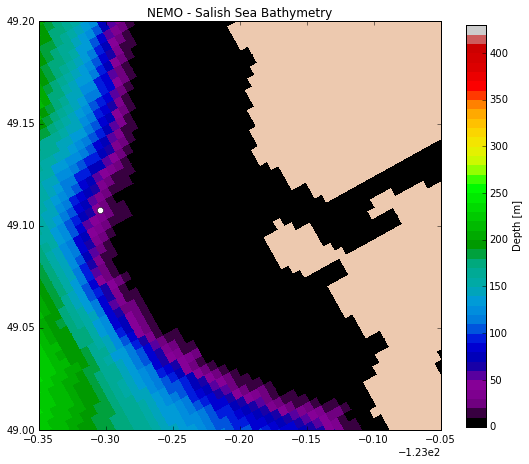

In [46]:
#fig, axs = plt.subplots(1,3,figsize=(10,25))
bathy_tools.plot_colourmesh(
    bathy_2, 'NEMO - Salish Sea Bathymetry',
    axis_limits=(-123.35, -123.05, 49., 49.2), 
    colour_map='spectral', bins=50);
plt.plot(-(123+18.25/60.), 49+6.45/60.,'wo')

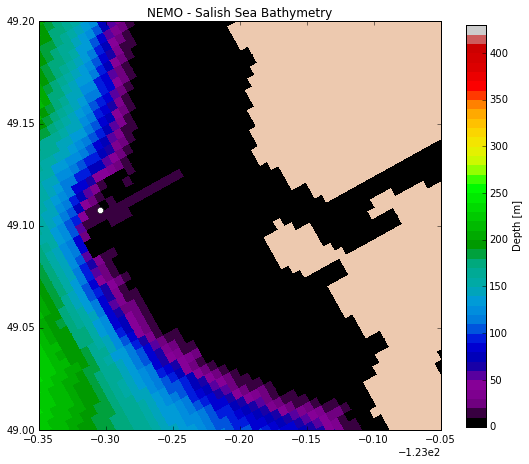

In [47]:
figg = bathy_tools.plot_colourmesh(
    bathy_3, 'NEMO - Salish Sea Bathymetry',
    axis_limits=(-123.35, -123.05, 49., 49.2), 
colour_map='spectral', bins=50)
plt.plot(-(123+18.25/60.), 49+6.45/60.,'wo')

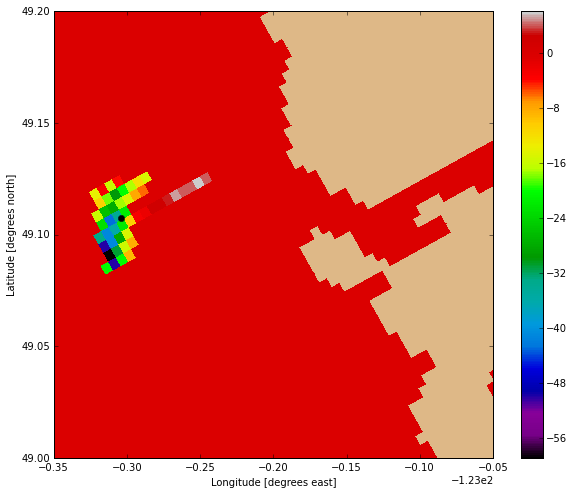

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
aspect = viz_tools.set_aspect(ax, coords='map', lats=lat_3)
cmap = plt.get_cmap('spectral')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(lon_3[:], lat_3[:], bathyy_3[:]-bathyy_2, cmap=cmap)
cbar = fig.colorbar(mesh)
plt.axis((-123.35, -123.05, 49, 49.2))
plt.plot(-(123+18.25/60.), 49+6.45/60.,'ok')

# Add axis labels
ax.set_xlabel('{longitude.long_name} [{longitude.units}]'.format(longitude=lon_3))
ax.set_ylabel('{latitude.long_name} [{latitude.units}]'.format(latitude=lat_3))

<matplotlib.colorbar.Colorbar instance at 0x7f96ef8ac5f0>

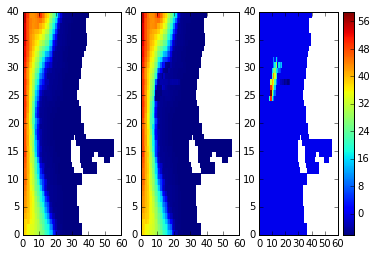

In [14]:
plt.subplot(1, 3, 1)
plt.pcolormesh(bathyy_2[400:440, 280:335])
plt.subplot(1, 3, 2)
plt.pcolormesh(bathyy_3[400:440, 280:335])
plt.subplot(1, 3, 3)
plt.pcolormesh(bathyy_2[400:440, 280:335] - bathyy_3[400:440, 280:335], cmap=plt.cm.jet)
plt.colorbar()

In [10]:
coords = nc.Dataset('/ocean/jieliu/research/meopar\
/nemo-forcing/grid/coordinates_seagrid_SalishSea.nc', 'r')

In [11]:
lat_f = coords.variables['gphif'][0] #corner grid cell
lon_f = coords.variables['glamf'][0]
lon = bathy_2.variables['nav_lon']
lat = bathy_2.variables['nav_lat']

## Show center grid and corner grid

-9.56176757812
6.47987365723
13.838
100.0


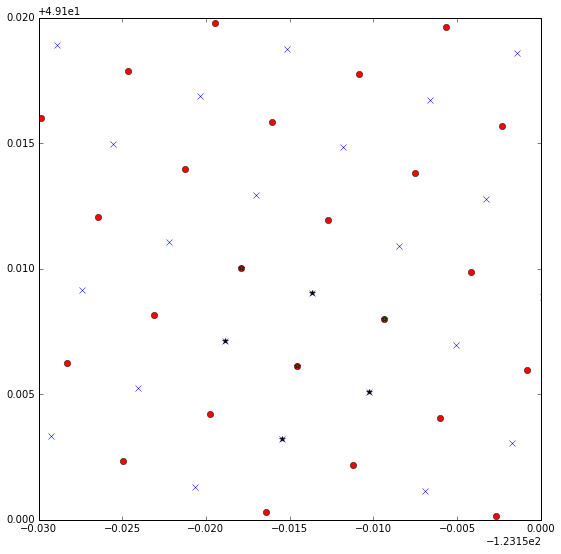

In [12]:
imin = 380; imax=480; jmin = 260; jmax = 398
plt.figure(figsize=(9,9))
plt.plot(lon[imin:imax,jmin:jmax], lat[imin:imax,jmin:jmax], 'or');
plt.plot(lon_f[imin:imax,jmin:jmax], lat_f[imin:imax,jmin:jmax], 'xb')
#plt.plot(lon[416, 334], lat[416, 334], '*k')
plt.plot(lon_f[417,312], lat_f[417,312], '*k')
plt.plot(lon_f[417,313], lat_f[417,313], '*k')
plt.plot(lon_f[418,313], lat_f[418,313], '*k')
plt.plot(lon_f[418,312], lat_f[418,312], '*k')
plt.plot(lon[418,313], lat[418,313], '*g')
plt.plot(lon[418,314], lat[418,314], '*g')
plt.plot(lon[419,313], lat[419,313], '*g')
plt.xlim((-123.18, -123.15))
plt.ylim(( 49.1, 49.12))
print (lon[418, 314] + 123) * 60
print (lat[418, 314] -49) *60
print (6.48 - 5) *9.35
print (bathyy_2[431, 291])

(898, 398)
48.8562278748


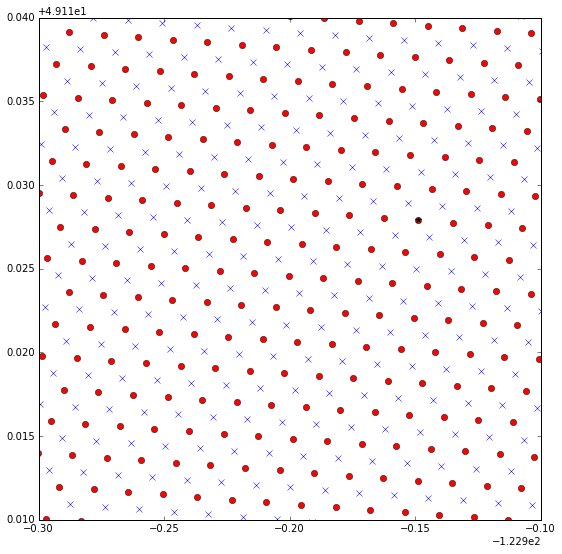

In [13]:
imin = 380; imax=480; jmin = 260; jmax = 398
plt.figure(figsize=(9,9))
plt.plot(lon[imin:imax,jmin:jmax], lat[imin:imax,jmin:jmax], 'or');
plt.plot(lon_f[imin:imax,jmin:jmax], lat_f[imin:imax,jmin:jmax], 'xb')
plt.plot(lon[416, 334], lat[416, 334], '*k')
plt.plot(lon_f[417, 312], lat_f[417, 312], '*g')
plt.xlim((-123.2, -123.))
plt.ylim((49.12, 49.15))
print lon.shape
print lat[380, 260]